In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
col = ['bpm','rmssd','bsv','sdnn','phase']
data_path = ("/home/fsz/Bureau/Developpement/test_classif/another_file.csv")
data = pd.read_csv(data_path ,names=col)
data.head()

,bpm,rmssd,bsv,sdnn,phase
0,86.022681,19.969923,1.808829,31.614496,stress
1,90.021803,17.691368,0.698733,17.222741,rest
2,104.030797,21.704360,1.338436,30.350783,stress
3,52.010452,79.913276,0.231673,54.306181,rest
4,104.014097,30.553062,1.535493,72.012498,stress


In [3]:
X = data.iloc[:, 0:3].values
y = data.iloc[:,[4]].values

### Encodage des labels

In [4]:
lb = LabelBinarizer()
y = lb.fit_transform(y)
y=np.ravel(y,order='C')

### Séparation data 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Recherche du k optimal

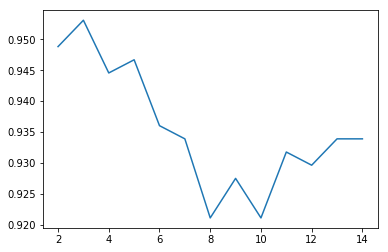

Nombre de voisins optimal: 3


In [6]:
accuracy = []

for k in range(2,15):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    accuracy.append(knn.score(X_test,y_test))

plt.plot(range(2,15),accuracy)
plt.show()
print("Nombre de voisins optimal:",np.argmax(accuracy)+2)

### Sélection automatique du nombre de voisins optimal

In [7]:
arg_max = np.argmax(accuracy)
k = arg_max + 2
knn_optimized = KNeighborsClassifier(k)
knn_optimized.fit(X_train,y_train)
knn_optimized.score(X_test,y_test)

0.9530916844349681

### Chargement d'un second dataset correspondant aux données physilogiques de personnes jamais vues par le classifier

In [8]:
data_test = pd.read_csv("test_classification.csv",names=col)

In [9]:
X = data_test.iloc[:, 0:3].values
y = data_test.iloc[:,[4]].values

In [10]:
lb = LabelBinarizer()
y = lb.fit_transform(y)
y=np.ravel(y,order='C')

In [11]:
knn_optimized.score(X,y)

0.7034825870646766